# Zomato Data Analysis Project

### Step1- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step2- Create the DataFrame

In [3]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Checking the shape of my data

In [4]:
print('No. of rows:-',df.shape[0])
print('No. of columns:-',df.shape[1])

No. of rows:- 148
No. of columns:- 7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


### Convert the data type of column- rate

In [7]:
def handle_rate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Types of Restaurant

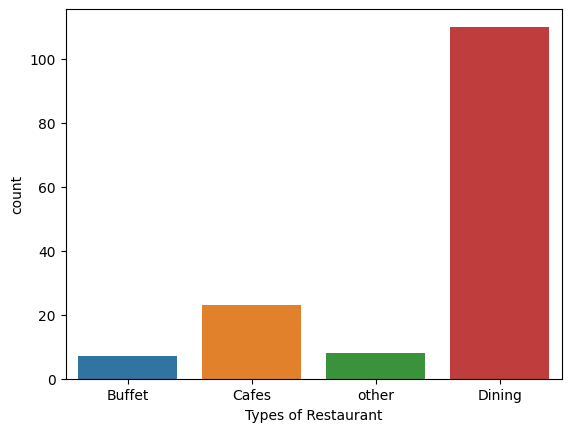

In [10]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of Restaurant')
plt.show()

### Conclusion- majority of the Restaurants falls in Dining Category

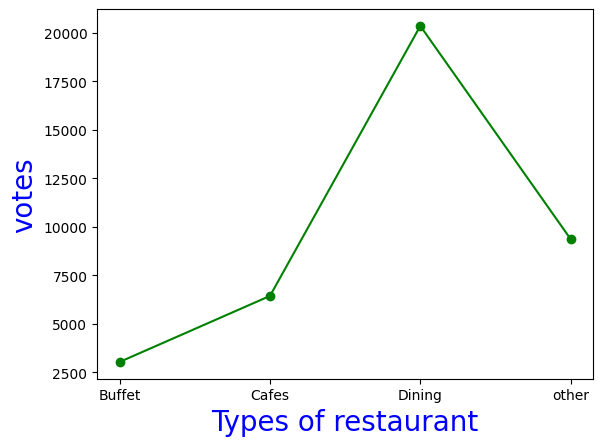

In [12]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of restaurant',c='blue',size=20)
plt.ylabel('votes',c='blue',size=20)
plt.show()

### Conclusion- Dining restaurants has recieved maximum votes

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


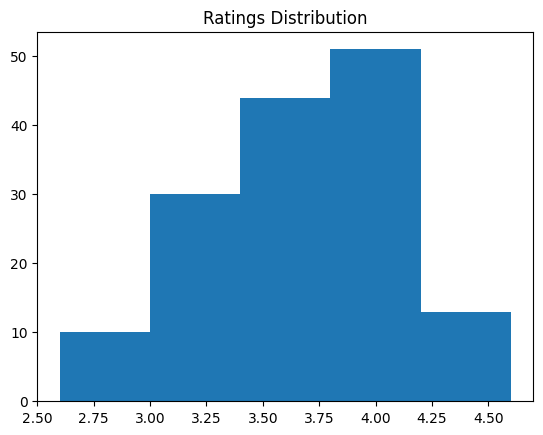

In [14]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

### Conclusion- The majority restaurants recieved ratings from 3.5 to 4

### Average order spending by couples

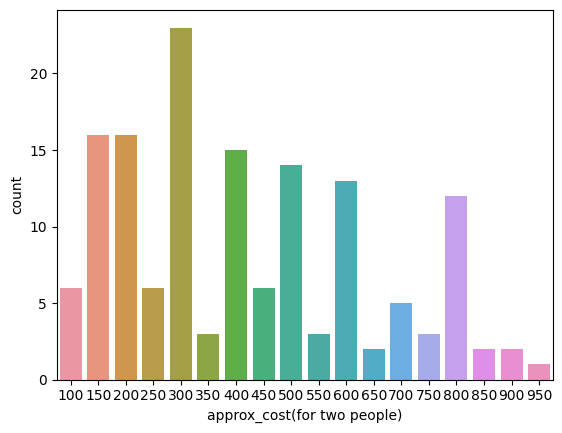

In [15]:
coupled_data = df['approx_cost(for two people)']
sns.countplot(x=coupled_data)
plt.show()

### Conclusion- The majority of couples prefer restaurant with an approximate cost of 300 rupees

### Which mode recieves maximum ratings

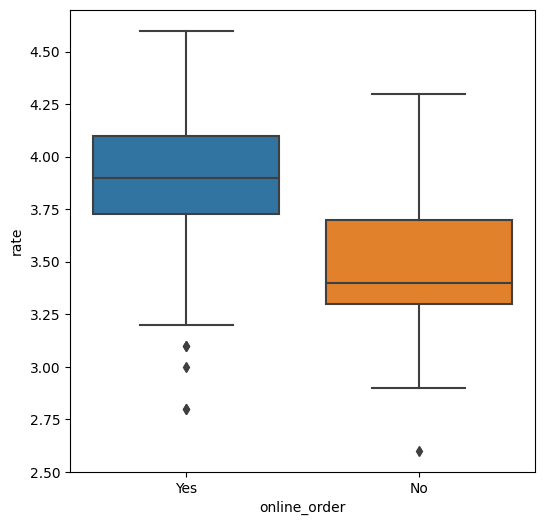

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='online_order',y='rate')
plt.show()

### Conclusion- offline order recieved lower ratings in comparision to online order

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


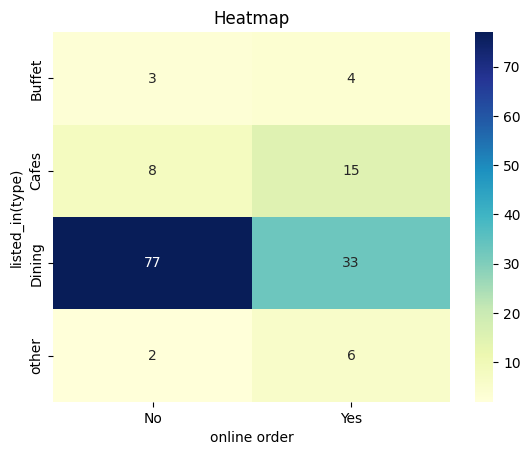

In [18]:
pivot_table = df.pivot_table(index=df['listed_in(type)'],columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed_in(type)')
plt.show()

### Conclusion- Dining Restaurants primarily accepts offline orders,whereas cafes primarily recieve online orders.This suggests that client prefers to place orders in person at restaurants,but prefer online ordering at cafes